In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import csv
import numpy as np

from matplotlib.pyplot import figure

df= pd.read_csv('Advertising.csv')
df['Constant'] = np.ones(200)

print(df.shape)
df.head(5)

(200, 6)


,Unnamed: 0,TV,Radio,Newspaper,Sales,Constant
0,1,230.1,37.8,69.2,22.1,1.0
1,2,44.5,39.3,45.1,10.4,1.0
2,3,17.2,45.9,69.3,9.3,1.0
3,4,151.5,41.3,58.5,18.5,1.0
4,5,180.8,10.8,58.4,12.9,1.0


### Radio v/s Sales

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           4.35e-19
Time:                        22:56:05   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

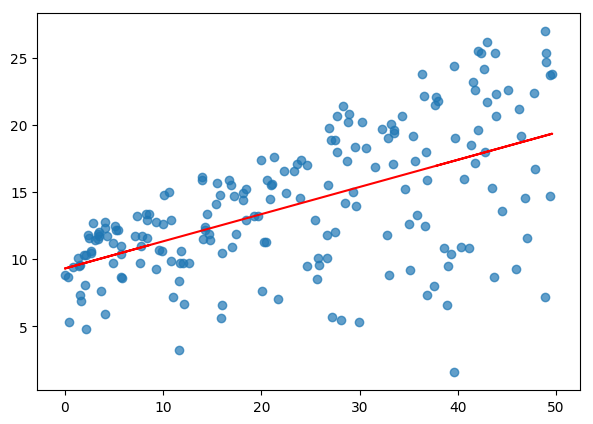

Residual Sum Error: 4.27494435490106


In [56]:
import pandas as pd
import statsmodels.formula.api as sm

X = df['Radio']
y = np.array(df['Sales'])

result = sm.ols(formula = "Sales ~ Radio", data = df).fit()

print(result.summary())

figure(num=None, figsize=(7, 5), dpi=100, facecolor='w', edgecolor='k')
predicted = result.predict(X)
plt.plot(X, predicted,color = 'r', alpha =1)
plt.scatter(X, y, alpha = 0.7)
plt.show()

rse = (np.dot(predicted - y, predicted - y)/198)**(1/2)

print("Residual Sum Error:", rse )

### Radio v/s Newspaper

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 06 Feb 2019   Prob (F-statistic):            0.00115
Time:                        22:56:57   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

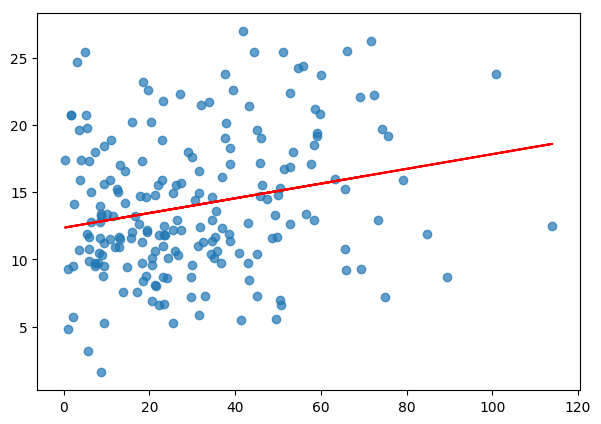

Residual Sum Error: 5.092480366520192


In [59]:
import pandas as pd
import statsmodels.formula.api as sm

X = df['Newspaper']
y = df['Sales']

result = sm.ols(formula = "Sales ~ Newspaper", data = df).fit()

print(result.summary())

figure(num=None, figsize=(7, 5), dpi=100, facecolor='w', edgecolor='k')
predicted = result.predict(X)
plt.plot(X, predicted,color = 'r', alpha =1)
plt.scatter(X, y, alpha = 0.7)
plt.show()

rse = (np.dot(predicted - y, predicted - y)/198)**(1/2)

print("Residual Sum Error:", rse )

### TV v/s Sales

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        22:56:21   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

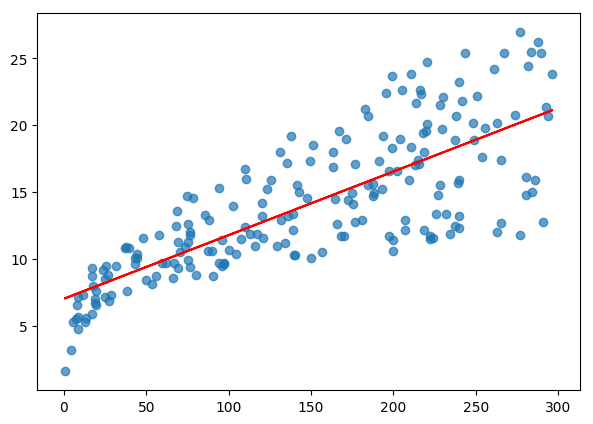

Residual Sum Error: 3.258656368650463


In [58]:
import pandas as pd
import statsmodels.formula.api as sm

X = df['TV']
y = df['Sales']

result = sm.ols(formula = "Sales ~ TV", data = df).fit()

print(result.summary())

figure(num=None, figsize=(7, 5), dpi=100, facecolor='w', edgecolor='k')
predicted = result.predict(X)
plt.plot(X, predicted,color = 'r', alpha =1)
plt.scatter(X, y, alpha = 0.7)
plt.show()

rse = (np.dot(predicted - y, predicted - y)/198)**(1/2)

print("Residual Sum Error:", rse )

#### In every case the p value is quite low so it seems like none of the coefficients are zero. But lets see what multiple linear regression give us.


In [60]:
import pandas as pd
import statsmodels.formula.api as sm

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

result = sm.ols(formula = "Sales ~ TV + Radio + Newspaper", data = df).fit()

print(result.summary())

predicted = result.predict(X)

rse = (np.dot(predicted - y, predicted - y)/198)**(1/2)

print("Residual Sum Error:", rse )

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        22:57:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

#### The high p-value of newspaper suggests that the sales dont depend on newspapers.


In [61]:
import pandas as pd
import statsmodels.formula.api as sm

X = df[['TV', 'Radio']]
y = df['Sales']

result = sm.ols(formula = "Sales ~ TV + Radio", data = df).fit()

print(result.summary())

predicted = result.predict(X)

rse = (np.dot(predicted - y, predicted - y)/198)**(1/2)

print("Residual Sum Error:", rse )

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           4.83e-98
Time:                        22:57:06   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

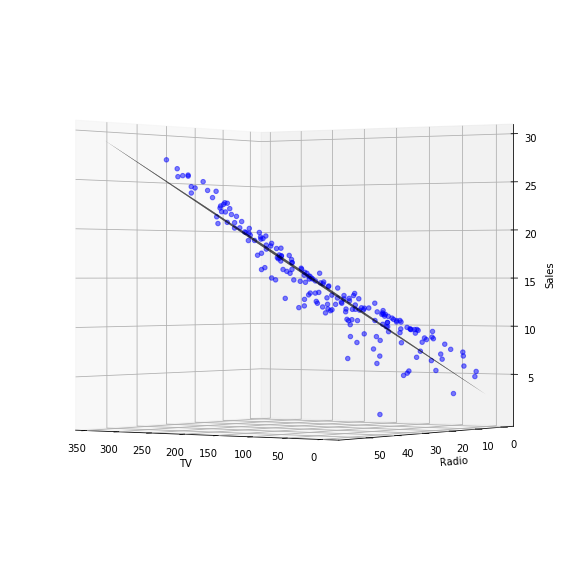

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))

axis = fig.add_subplot(111, projection='3d')
axis.scatter(df['TV'], df['Radio'], df['Sales'], c='blue', marker='o', alpha=0.5)

axis.set_xlabel('TV')
axis.set_ylabel('Radio')
axis.set_zlabel('Sales')
x = np.arange(0, 350, 20)                # generate a mesh
y = np.arange(0, 60, 4)
x, y = np.meshgrid(x, y)
X = np.array([np.ones(len(x.ravel()))])
new = np.concatenate((X,[x.ravel()],[y.ravel()]), axis=0)
z=np.dot(result.params,np.array(new)).reshape(x.shape)

axis.plot_surface(x, y, z, rstride=1, cstride=1, color='None', alpha = 1)

axis.view_init(0, 125)


#### Conclusion : The fit seems to be preety good except for few anomalies. Thus we conclude that, the channels responsible for sales are TV and Radio.